In [8]:
import sys
import os

current_dir = os.getcwd()

src_directory = current_dir + "/../src/"

if src_directory not in sys.path:
    sys.path.append(src_directory)

import numpy as np
import matplotlib.pyplot as plt
from tueplots import bundles
from DataLoaderClass import DataLoader

dataloader = DataLoader()

data_array, years, durations, kids = dataloader.load_data()

In [9]:
print(dataloader.getDF())
sum_all_divs = data_array.sum()
print(sum_all_divs)

     year                    duration   0 kids   1 kid  2 kids  3+ kids
0    1997     Ehedauer unter 2 Jahren    971.0   144.0    12.0      2.0
1    1997            Ehedauer 2 Jahre   3298.0   675.0    59.0      9.0
2    1997            Ehedauer 3 Jahre   4526.0  1598.0   237.0     28.0
3    1997            Ehedauer 4 Jahre   4984.0  2652.0   496.0     51.0
4    1997            Ehedauer 5 Jahre   5178.0  3250.0   781.0     99.0
..    ...                         ...      ...     ...     ...      ...
671  2022           Ehedauer 22 Jahre   1522.0   976.0   551.0    167.0
672  2022           Ehedauer 23 Jahre   1668.0   866.0   379.0    128.0
673  2022           Ehedauer 24 Jahre   1621.0   616.0   303.0     98.0
674  2022           Ehedauer 25 Jahre   1725.0   549.0   227.0     81.0
675  2022  Ehedauer 26 Jahre und mehr  18976.0  1875.0   614.0    248.0

[676 rows x 6 columns]
4596124.0


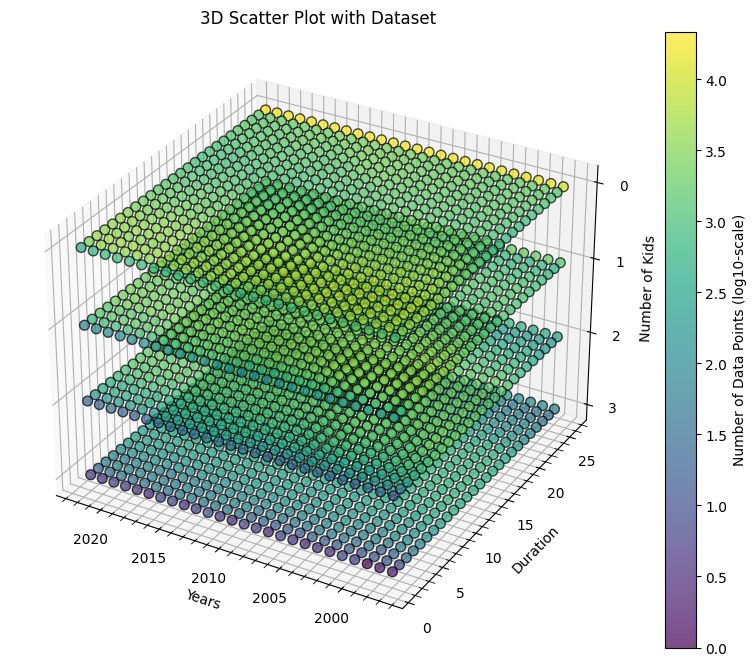

In [4]:
x_val = []
y_val = []
z_val = []

count_val = []

for year in range(0, len(data_array)):
    for duration in range(0, len(data_array[year])):
        for kid in range(0, len(data_array[year][duration])):
            x_val.append(year)
            y_val.append(duration)
            z_val.append(kid)
            count_val.append(data_array[year][duration][kid])

# Create a 3D scatter plot
fig1 = plt.figure(figsize=(10, 8))
ax1 = fig1.add_subplot(111, projection='3d')
sc1 = ax1.scatter(np.array(x_val) + 1997, np.array(y_val) + 1, z_val, c=np.log10(count_val), cmap='viridis', s=50, alpha=0.7, edgecolors="black")

# Add colorbar
cbar = plt.colorbar(sc1, ax=ax1, label='Number of Data Points (log10-scale)')

# Cosmetics
ax1.invert_zaxis()
ax1.invert_xaxis()

ax1.xaxis.set_major_locator(plt.MultipleLocator(5))
ax1.xaxis.set_minor_locator(plt.MultipleLocator(1))

ax1.yaxis.set_major_locator(plt.MultipleLocator(5))
ax1.yaxis.set_minor_locator(plt.MultipleLocator(1))
ax1.zaxis.set_major_locator(plt.MultipleLocator(1))

# Set labels and title
ax1.set_xlabel('Years')
ax1.set_ylabel('Duration')
ax1.set_zlabel('Number of Kids')
ax1.set_title('3D Scatter Plot with Dataset')

# Show the plot
plt.show()

Plot the whole data set to get a first intuition. 

Next step: also scale the size of the points with the value of the respecitve data points:

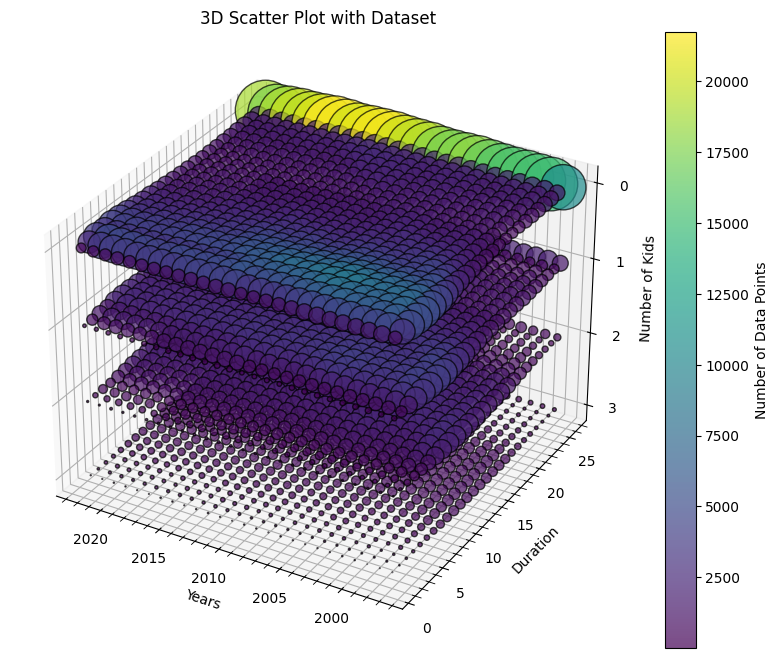

In [5]:
x_val = []
y_val = []
z_val = []

count_val = []

for year in range(0, len(data_array)):
    for duration in range(0, len(data_array[year])):
        for kid in range(0, len(data_array[year][duration])):
            x_val.append(year)
            y_val.append(duration)
            z_val.append(kid)
            count_val.append(data_array[year][duration][kid])

# Create a 3D scatter plot
fig2 = plt.figure(figsize=(10, 8))
ax2 = fig2.add_subplot(111, projection='3d')
sc2 = ax2.scatter(np.array(x_val) + 1997, np.array(y_val) + 1, z_val, c=np.array(count_val), cmap='viridis', s=np.array(count_val) / 10, alpha=0.7, edgecolors="black")

# Add colorbar
cbar = plt.colorbar(sc2, ax=ax2, label='Number of Data Points')


ax2.invert_zaxis()
ax2.invert_xaxis()

ax2.xaxis.set_major_locator(plt.MultipleLocator(5))
ax2.xaxis.set_minor_locator(plt.MultipleLocator(1))

ax2.yaxis.set_major_locator(plt.MultipleLocator(5))
ax2.yaxis.set_minor_locator(plt.MultipleLocator(1))
ax2.zaxis.set_major_locator(plt.MultipleLocator(1))

# Set labels and title
ax2.set_xlabel('Years')
ax2.set_ylabel('Duration')
ax2.set_zlabel('Number of Kids')
ax2.set_title('3D Scatter Plot with Dataset')

# Show the plot
plt.show()

Plot strongly shows the effect of the accumulated divorces with label "duration >= 26 years". Next we dropped these points
to get a better visualization of the rest of the dataset. Points might also be dropped for the analysis of the 
most likely marriage duration to get divorced, since they have this high influence and distortion regarding the analysis.

(26, 25, 4)


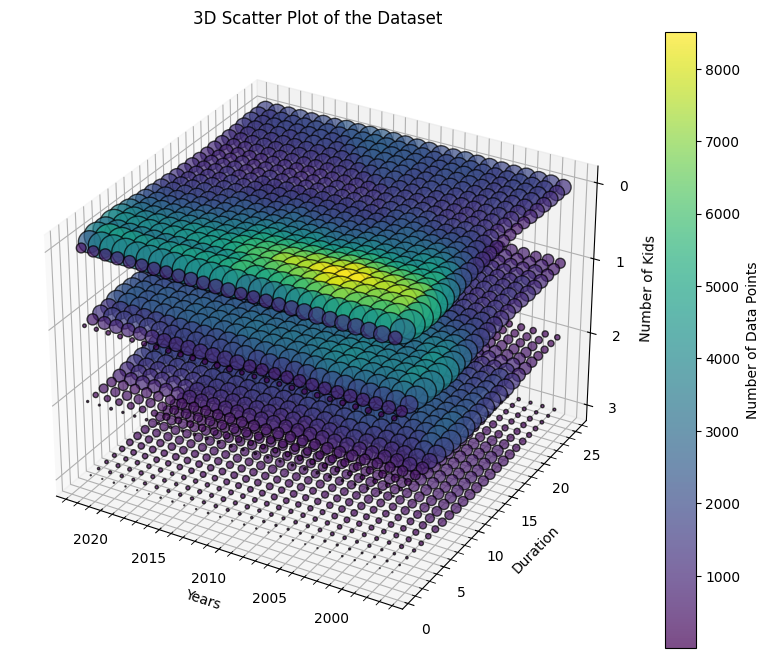

In [6]:
data_array_test, years, durations, kids = dataloader.load_data(durations_to_drop=[26])

print(np.shape(data_array_test))

x_val = []
y_val = []
z_val = []

count_val = []

for year in range(0, len(data_array_test)):
    for duration in range(0, len(data_array_test[year])):
        for kid in range(0, len(data_array_test[year][duration])):
            x_val.append(year)
            y_val.append(duration)
            z_val.append(kid)
            count_val.append(data_array_test[year][duration][kid])

# Create a 3D scatter plot
fig2_1 = plt.figure(figsize=(10, 8))
ax2_1 = fig2_1.add_subplot(111, projection='3d')
sc2_1 = ax2_1.scatter(np.array(x_val) + 1997, np.array(y_val) + 1, z_val, c=np.array(count_val), cmap='viridis', s=np.array(count_val) / 10, alpha=0.7, edgecolors="black")

# Add colorbar
cbar2_1 = plt.colorbar(sc2_1, ax=ax2_1, label='Number of Data Points')


ax2_1.invert_zaxis()
ax2_1.invert_xaxis()

ax2_1.xaxis.set_major_locator(plt.MultipleLocator(5))
ax2_1.xaxis.set_minor_locator(plt.MultipleLocator(1))

ax2_1.yaxis.set_major_locator(plt.MultipleLocator(5))
ax2_1.yaxis.set_minor_locator(plt.MultipleLocator(1))
ax2_1.zaxis.set_major_locator(plt.MultipleLocator(1))

# Set labels and title
ax2_1.set_xlabel('Years')
ax2_1.set_ylabel('Duration')
ax2_1.set_zlabel('Number of Kids')
ax2_1.set_title('3D Scatter Plot of the Dataset')

# Show the plot
plt.show()

Having a first look the data seems indeed to show, that most people tend to get divorced after three to six years of marriage.
Also it seems that people with more children tend to get divorced later in there marriage.
Last plot to get a intution: 2d plot for every amount of children in the marriage.

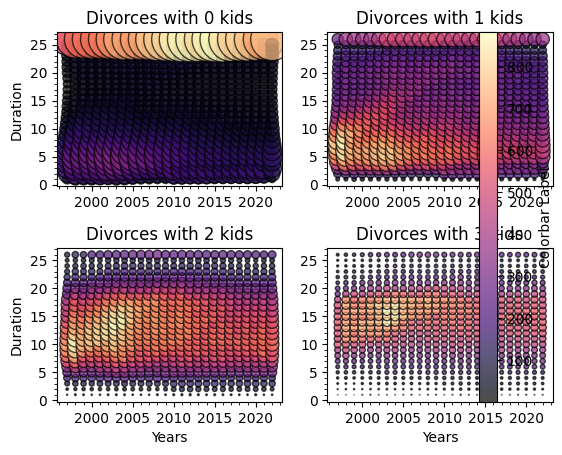

In [7]:
x_val = [[], [], [], []]
y_val = [[], [], [], []]
z_val = [[], [], [], []]

count_val = [[], [], [], []]

for year in range(0, len(data_array)):
    for duration in range(0, len(data_array[year])):
        for kid in range(0, len(data_array[year][duration])):
            x_val[kid].append(year)
            y_val[kid].append(duration)
            z_val[kid].append(kid)
            count_val[kid].append(data_array[year][duration][kid])

# plot with size scaled

fig3, ax3 = plt.subplots(nrows=2, ncols=2)

sc30 = ax3[0, 0].scatter(np.array(x_val[0]) + 1997, np.array(y_val[0]) + 1, c=count_val[0], cmap='magma', s=(np.array(count_val[0]) / 20), alpha=0.7,
           edgecolors="black")
sc31 = ax3[0, 1].scatter(np.array(x_val[1]) + 1997, np.array(y_val[1]) + 1, c=count_val[1], cmap='magma', s=(np.array(count_val[1]) / 20), alpha=0.7,
           edgecolors="black")
sc32 = ax3[1, 0].scatter(np.array(x_val[2]) + 1997, np.array(y_val[2]) + 1, c=count_val[2], cmap='magma', s=(np.array(count_val[2]) / 20), alpha=0.7,
           edgecolors="black")
sc33 = ax3[1, 1].scatter(np.array(x_val[3]) + 1997, np.array(y_val[3]) + 1, c=count_val[3], cmap='magma', s=(np.array(count_val[3]) / 20), alpha=0.7,
           edgecolors="black")


# Add colorbar to the right of the subplots
cbar = plt.colorbar(sc33, ax=ax3, label='Colorbar Label')

# Adjust layout to increase the distance between subplots
plt.subplots_adjust(hspace=0.4)

ax3[0, 0].xaxis.set_major_locator(plt.MultipleLocator(5))
ax3[0, 0].xaxis.set_minor_locator(plt.MultipleLocator(1))
ax3[0, 0].yaxis.set_major_locator(plt.MultipleLocator(5))
ax3[0, 0].yaxis.set_minor_locator(plt.MultipleLocator(1))
ax3[0, 0].set_ylabel('Duration')
ax3[0, 0].set_title('Divorces with 0 kids')

ax3[0, 1].xaxis.set_major_locator(plt.MultipleLocator(5))
ax3[0, 1].xaxis.set_minor_locator(plt.MultipleLocator(1))
ax3[0, 1].yaxis.set_major_locator(plt.MultipleLocator(5))
ax3[0, 1].yaxis.set_minor_locator(plt.MultipleLocator(1))
ax3[0, 1].set_title('Divorces with 1 kids')

ax3[1, 0].xaxis.set_major_locator(plt.MultipleLocator(5))
ax3[1, 0].xaxis.set_minor_locator(plt.MultipleLocator(1))
ax3[1, 0].yaxis.set_major_locator(plt.MultipleLocator(5))
ax3[1, 0].yaxis.set_minor_locator(plt.MultipleLocator(1))
ax3[1, 0].set_xlabel('Years')
ax3[1, 0].set_ylabel('Duration')
ax3[1, 0].set_title('Divorces with 2 kids')

ax3[1, 1].xaxis.set_major_locator(plt.MultipleLocator(5))
ax3[1, 1].xaxis.set_minor_locator(plt.MultipleLocator(1))
ax3[1, 1].yaxis.set_major_locator(plt.MultipleLocator(5))
ax3[1, 1].yaxis.set_minor_locator(plt.MultipleLocator(1))
ax3[1, 1].set_xlabel('Years')
ax3[1, 1].set_title('Divorces with 3 kids')

plt.show()

Something is not working correctly with the colorbar. Data is not scaled with one colorbar as the plot suggests.